In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## G-PCC

In [3]:
csvdir = 'comparison_vcn/gpcc_attn_data110.csv'
df = pd.read_csv(csvdir).mean()
num_rates = 4
bpp_gpcc110 = np.array([df['R'+str(idx)+'_bpp'] for idx in range(num_rates)]).round(4)
psnr_gpcc110 = np.array([df['R'+str(idx)+'_mseF,PSNR (p2point)'] for idx in range(num_rates)]).round(4)
print(bpp_gpcc110, '\n', psnr_gpcc110)

[4.7487 2.5952 1.2021 0.491 ] 
 [77.0174 70.9915 64.9507 58.9264]


In [4]:
np.array([df['R'+str(idx)+'_enc_time_wall'] for idx in range(num_rates)]).round(4)

array([0.898 , 0.6425, 0.4426, 0.3216])

In [5]:
np.array([df['R'+str(idx)+'_dec_time_wall'] for idx in range(num_rates)]).round(4)

array([0.6008, 0.3894, 0.2257, 0.1284])

## attn

In [8]:
# csvdir = 'results/sparse_lossy/attn_data110.csv'
csvdir = 'comparison_vcn/attn_data110.csv'
df = pd.read_csv(csvdir).mean()
num_rates = 4
bpp_attn110 = np.array([df['R'+str(idx)+'_bpp'] for idx in range(num_rates)]).round(4)
psnr_attn110 = np.array([df['R'+str(idx)+'_psnr_d1'] for idx in range(num_rates)]).round(4)
print(bpp_attn110, '\n', psnr_attn110)

[3.8525 2.1019 0.9679 0.3936] 
 [77.0167 70.9879 64.9954 58.9477]


In [9]:
enc_time = [0.064, 0.138, 0.267, 0.445]
dec_time = [45, 115, 267, 530]

## Ours

In [10]:
csvdir = 'comparison_vcn/ours_sparse_attn_data110.csv'
df = pd.read_csv(csvdir).mean()
num_rates = 4
bpp_ours = np.array([df['R'+str(idx)+'_bpp'] for idx in range(num_rates)]).round(4)
psnr_ours = np.array([df['R'+str(idx)+'_mseF,PSNR (p2point)'] for idx in range(num_rates)]).round(4)
print(bpp_ours, '\n', psnr_ours)

[3.6935 2.0164 0.9392 0.3946] 
 [77.0167 70.9879 64.9954 58.9477]


In [11]:
np.array([df['R'+str(idx)+'_enc_time'] for idx in range(num_rates)]).round(4)

array([1.4374, 1.1662, 0.9411, 0.7675])

In [12]:
np.array([df['R'+str(idx)+'_dec_time'] for idx in range(num_rates)]).round(4)

array([1.1849, 0.9233, 0.7124, 0.551 ])

In [13]:
import sys
sys.path.append('../')
from extension.bjontegaard_metric import BD_RATE

In [14]:
bdrate_attn =  BD_RATE(bpp_gpcc110, psnr_gpcc110, bpp_attn110, psnr_attn110)
bdrate_ours = BD_RATE(bpp_gpcc110, psnr_gpcc110, bpp_ours, psnr_ours)
print(bdrate_attn, bdrate_ours)

-19.482804457135583 -22.001584549704965


In [15]:
import numpy as np

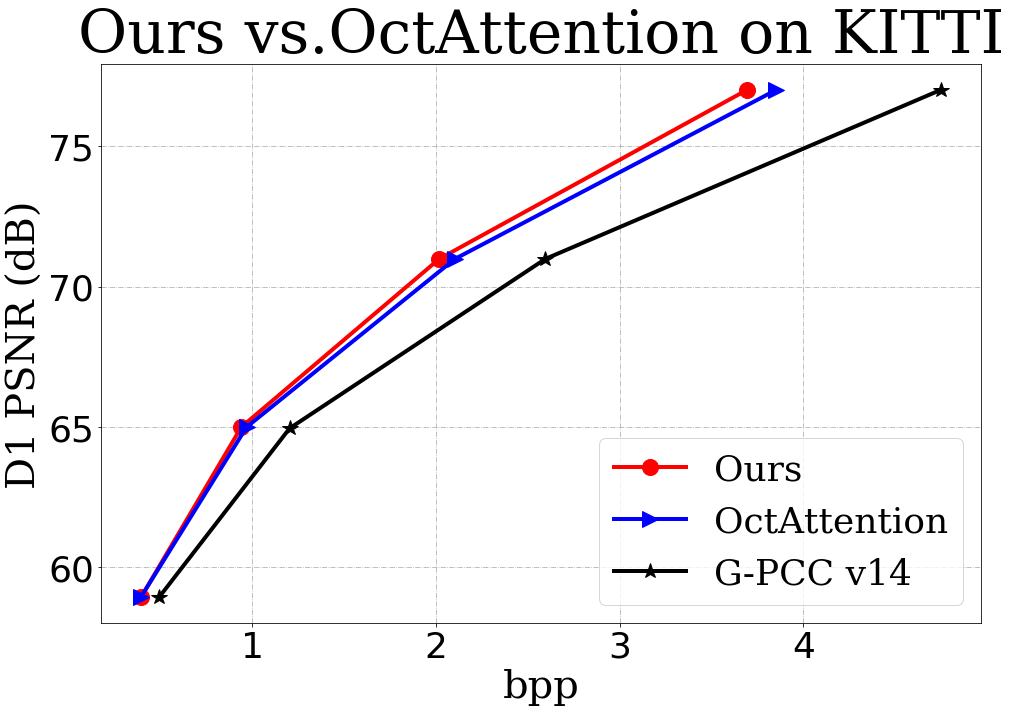

In [16]:
fig, ax = plt.subplots(figsize=(7.3*2,5*2))

# Ours
plt.plot(bpp_ours, psnr_ours, label='Ours', color='red',marker='o', 
         linewidth=4,markersize=16)

plt.plot(bpp_attn110, psnr_attn110, label='OctAttention', color='blue',marker='>',  
         linewidth=4,markersize=16)

# G-PCC
plt.plot(bpp_gpcc110, psnr_gpcc110, label='G-PCC v14',color='black',marker='*', 
         linewidth=4,markersize=16)

ax.locator_params(axis='x', nbins=8)
ax.locator_params(axis='y', nbins=6)
plt.tick_params(labelsize=36)
plt.xlabel("bpp", fontdict={'family':'serif', 'weight':'normal','size':40})
plt.ylabel("D1 PSNR (dB)", fontdict={'family':'serif', 'weight':'normal','size':40})

plt.title('Ours vs.OctAttention on KITTI', fontdict={'family':'serif', 'weight':'normal','size':60})
plt.grid(ls='-.')
plt.legend(loc='lower right', ncol=1,
           prop={'family':'serif', 'weight':'normal','size':36})
fig.tight_layout()
os.makedirs('figs', exist_ok=True)
fig.savefig(os.path.join('figs', 'ours_vs_attn.pdf'))
# fig.savefig(os.path.join('figs', 'ours_vs_attn.png'))